<a href="https://colab.research.google.com/github/vanadnarayane26/KDAG-Competition/blob/main/KDAG_Competition_Team_DataX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


try:
  import category_encoders
  import timestring
  import dateutil
except:
  !pip install category_encoders
  !pip install timestring
  !pip install dateutil
  print('Installed and Imported!')
  import timestring
  import category_encoders as ce
  import dateutil

In [ ]:
#Train data
url = 'https://raw.githubusercontent.com/vanadnarayane26/KDAG-Competition/main/train.csv'
df = pd.read_csv(url)

In [ ]:
df_train = df.copy()

In [ ]:
#Test data
url_test = 'https://raw.githubusercontent.com/vanadnarayane26/KDAG-Competition/main/test.csv'
df_test = pd.read_csv(url_test)

In [ ]:
df_test_copy = df_test.copy()

In [ ]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
df.tail()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01
6699,6700,Los Angeles,0.2,160.776,3,West,fynota,Consumer,colddrinks,Standard Class,1659,10.0485,2021-01-01,90045,California,2021-01-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6700 non-null   int64  
 1   departure city   6700 non-null   object 
 2   discount         6700 non-null   float64
 3   price            6700 non-null   float64
 4   no of items      6700 non-null   int64  
 5   location         6700 non-null   object 
 6   class            6700 non-null   object 
 7   segment          6700 non-null   object 
 8   sub-class        6700 non-null   object 
 9   delivery type    6699 non-null   object 
 10  RID              6700 non-null   int64  
 11  profit           6700 non-null   float64
 12  delivery date    6700 non-null   object 
 13  address code     6700 non-null   int64  
 14  departure state  6700 non-null   object 
 15  placement date   6700 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 837.6+ KB


In [ ]:
df.describe()

,id,discount,price,no of items,RID,profit,address code
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,3350.500000,0.155876,234.424275,3.798507,4954.381791,29.121046,54719.073284
std,1934.267734,0.205922,641.440815,2.225327,2921.304952,230.712951,32092.421012
min,1.000000,0.000000,0.836000,1.000000,1.000000,-6599.978000,1040.000000
25%,1675.750000,0.000000,17.340000,2.000000,2389.750000,1.713750,22204.000000
50%,3350.500000,0.200000,54.960000,3.000000,4941.500000,8.803200,55113.000000
75%,5025.250000,0.200000,212.940000,5.000000,7507.250000,30.023400,90004.000000
max,6700.000000,0.800000,22638.480000,14.000000,9990.000000,8399.976000,99301.000000


In [ ]:
len(df['address code'].unique())

562

In [ ]:
df_test.shape

(3294, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


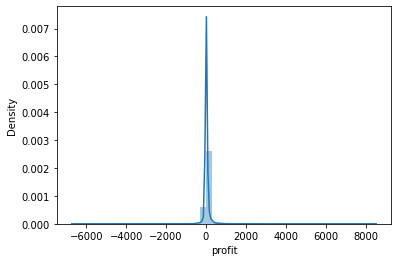

In [ ]:
sns.distplot(df['profit'])
plt.show()

# **EDA**

In [ ]:
df['placement date']=pd.to_datetime(df['placement date'])

In [ ]:
df_test['placement date']=pd.to_datetime(df_test['placement date'])

In [ ]:
df['month'] = df['placement date'].dt.month
df[['placement date','month']].head()

,placement date,month
0,2018-01-01,1
1,2018-01-01,1
2,2018-01-01,1
3,2018-01-01,1
4,2018-01-01,1


In [ ]:
df_test['month'] = df_test['placement date'].dt.month
df_test[['placement date','month']].head()

,placement date,month
0,2021-01-01,1
1,2021-01-01,1
2,2021-01-01,1
3,2021-01-01,1
4,2021-01-01,1


In [ ]:
df['quarter'] = df['placement date'].dt.quarter
df[['placement date','quarter']].head()

,placement date,quarter
0,2018-01-01,1
1,2018-01-01,1
2,2018-01-01,1
3,2018-01-01,1
4,2018-01-01,1


In [ ]:
df_test['quarter'] = df_test['placement date'].dt.quarter
df_test[['placement date','quarter']].head()

,placement date,quarter
0,2021-01-01,1
1,2021-01-01,1
2,2021-01-01,1
3,2021-01-01,1
4,2021-01-01,1


In [ ]:
df=df.drop(['placement date'],axis=1)
df_test=df_test.drop(['placement date'],axis=1)

In [ ]:
df.columns

Index(['id', 'departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'RID', 'profit',
       'delivery date', 'address code', 'departure state', 'month', 'quarter'],
      dtype='object')

## ***Departure city***

In [ ]:
len(df['departure city'].unique())

469

In [ ]:
df['departure city'].describe()

count              6700
unique              469
top       New York City
freq                610
Name: departure city, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


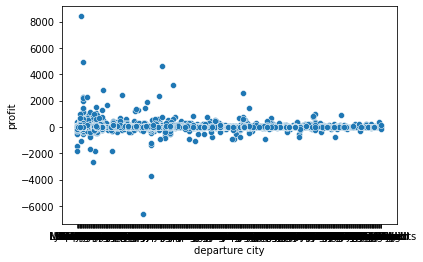

In [ ]:
#Categorical data will need encoding. Handle later
sns.scatterplot(df['departure city'],df['profit'])
plt.show()

## **Price**(skewed)

In [ ]:
df['price'].describe()

count     6700.000000
mean       234.424275
std        641.440815
min          0.836000
25%         17.340000
50%         54.960000
75%        212.940000
max      22638.480000
Name: price, dtype: float64

int continuous = box plot, scatter plot, remove outliers.
float continous = box plot, scatter plot, remove outliers.
object = barplot, catplot, stacked bar graph. missing values.
categorical missing values = mode.
int,float but categorical = = barplot, catplot, stacked bar graph. missing values.
search feature engineering and (extraction)
linear regression implementation through sklearn

In [ ]:
df['price'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


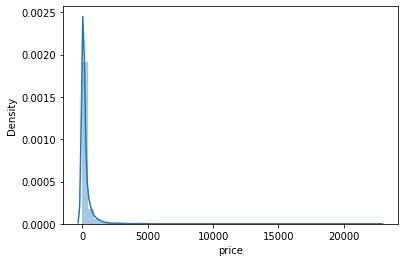

In [ ]:
sns.distplot(df['price'])
plt.show()

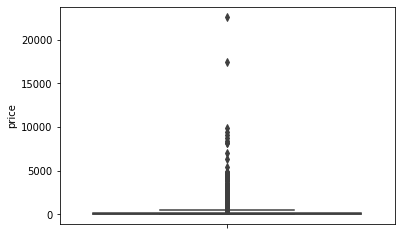

In [ ]:
sns.boxplot(y= df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


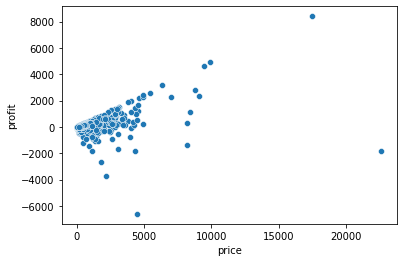

In [ ]:
sns.scatterplot(df['price'],df['profit'])
plt.show()

## **no of items**

In [ ]:
df['no of items'].describe()

count    6700.000000
mean        3.798507
std         2.225327
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: no of items, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


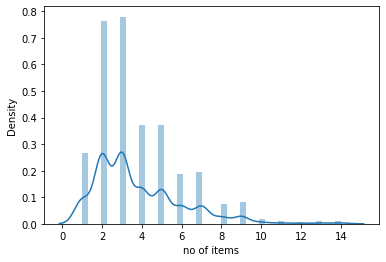

In [ ]:
sns.distplot(df['no of items'])
plt.show()

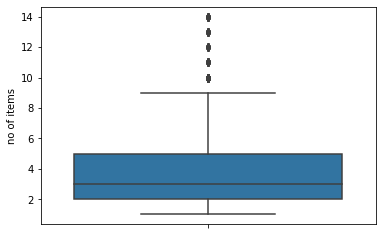

In [ ]:
sns.boxplot(y = df['no of items'])
plt.show()

In [ ]:
df['no of items'].unique()

array([ 2,  5,  3,  4,  1,  7,  6, 13,  8, 10,  9, 14, 12, 11])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


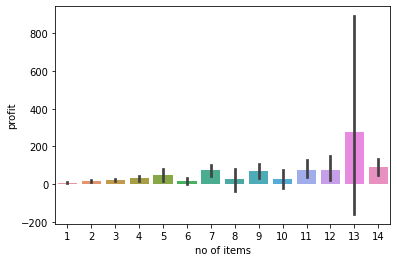

In [ ]:
sns.barplot(df['no of items'],df['profit'])
plt.show()

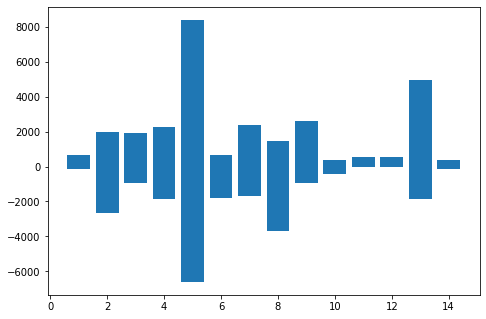

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['no of items'],df['profit'])
plt.show()

# **Discount**

# New Section

In [ ]:
df['discount'].describe()

count    6700.000000
mean        0.155876
std         0.205922
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: discount, dtype: float64

In [ ]:
df['discount'].value_counts()

0.00    3220
0.20    2437
0.70     281
0.80     193
0.30     159
0.40     137
0.60      99
0.10      68
0.50      47
0.15      36
0.32      16
0.45       7
Name: discount, dtype: int64

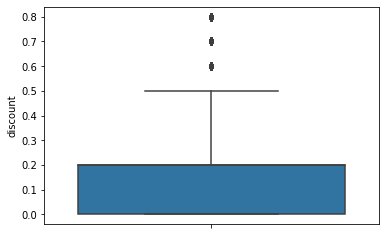

In [ ]:
sns.boxplot(y = df['discount'])
plt.show()

In [ ]:
df['discount'].unique()

array([0.2 , 0.  , 0.1 , 0.7 , 0.15, 0.8 , 0.6 , 0.4 , 0.5 , 0.3 , 0.32,
       0.45])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


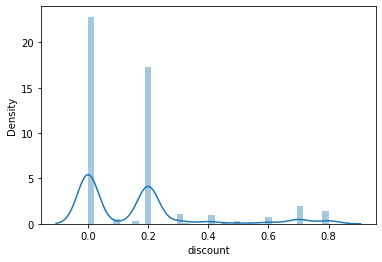

In [ ]:
sns.distplot(df['discount'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


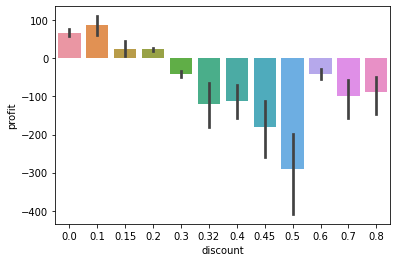

In [ ]:
sns.barplot(df['discount'],df['profit'])
plt.show()

## **location**

In [ ]:
df['location'].unique()

array(['Central', 'South', 'West', 'East'], dtype=object)

In [ ]:
df['location'].describe()

count     6700
unique       4
top       West
freq      2118
Name: location, dtype: object

In [ ]:
df['location'].isnull().sum()

0

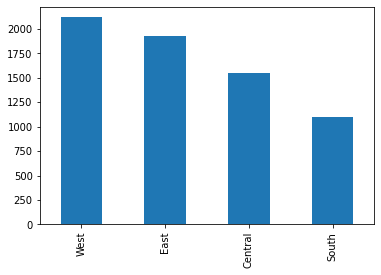

In [ ]:
df['location'].value_counts().plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


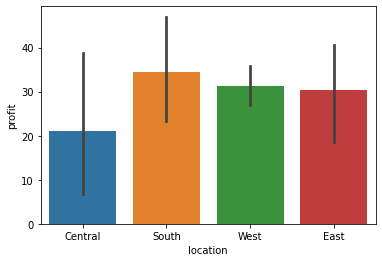

In [ ]:
sns.barplot(df['location'],df['profit'])
plt.show()

## **Class**

In [ ]:
df['class'].describe()

count       6700
unique         3
top       kariox
freq        4034
Name: class, dtype: object

In [ ]:
df['class'].unique()

array(['kariox', 'qexty', 'fynota'], dtype=object)

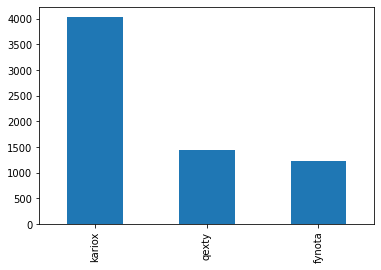

In [ ]:
df['class'].value_counts().plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


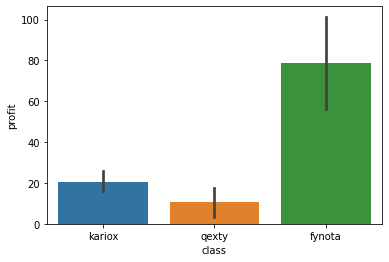

In [ ]:
sns.barplot(df['class'],df['profit'])
plt.show()

## **segment**

In [ ]:
df['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

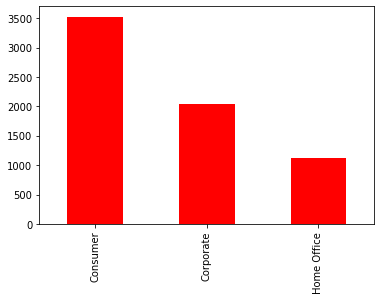

In [ ]:
df['segment'].value_counts().plot.bar(color = 'r')
plt.show()

In [ ]:
df['segment'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


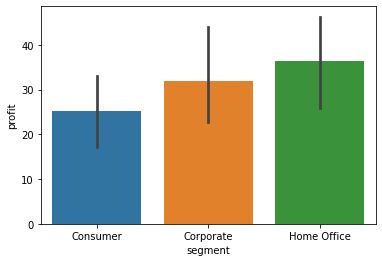

In [ ]:
sns.barplot(df['segment'],df['profit'])
plt.show()

## **sub-class**

# New section

In [ ]:
df['sub-class'].isnull().sum()

0

In [ ]:
df['sub-class'].unique()

array(['phone', 'headset', 'shorts', 'television', 'laptop', 'battery',
       'tshirts', 'watch', 'colddrinks', 'pants', 'lighting', 'hoodies',
       'chocolates', 'tablet', 'charger', 'sweets', 'fastfood'],
      dtype=object)

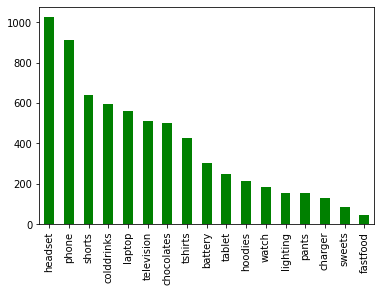

In [ ]:
df['sub-class'].value_counts().plot(kind = 'bar',color = 'g')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


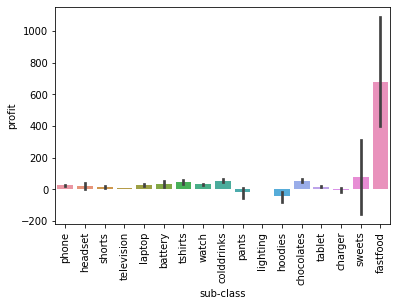

In [ ]:
ax = sns.barplot(df['sub-class'],df['profit'])
ax.set_xticklabels(labels = df['sub-class'].unique(),rotation = 90)
plt.show()

### **delivery type**

In [ ]:
df['delivery type'].describe()

count               6699
unique                 4
top       Standard Class
freq                4086
Name: delivery type, dtype: object

In [ ]:
df['delivery type'].unique()

array(['Standard Class', 'First Class', 'Second Class', nan, 'Same Day'],
      dtype=object)

In [ ]:
df['delivery type'].isnull().sum()

1

In [ ]:
df['delivery type'].fillna(df['delivery type'].mode()[0],inplace = True)

In [ ]:
df['delivery type'].isnull().sum()

0

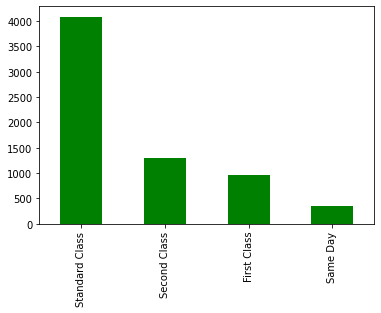

In [ ]:
df['delivery type'].value_counts().plot.bar(color = 'g')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


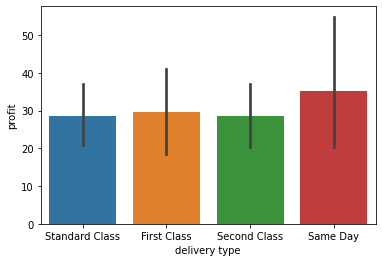

In [ ]:
sns.barplot(df['delivery type'],df['profit'])
plt.show()

## **departure state**

In [ ]:
df['departure state'].unique()

array(['Texas', 'Michigan', 'Tennessee', 'Arkansas', 'Arizona',
       'California', 'Florida', 'Indiana', 'New York', 'Nevada',
       'South Dakota', 'Virginia', 'Oregon', 'Kentucky', 'Georgia',
       'Pennsylvania', 'Illinois', 'Louisiana', 'Delaware', 'Ohio',
       'South Carolina', 'Washington', 'Missouri', 'Wisconsin',
       'New Jersey', 'North Carolina', 'Mississippi', 'Minnesota', 'Iowa',
       'New Mexico', 'Colorado', 'Utah', 'Maryland', 'Montana',
       'Massachusetts', 'Alabama', 'Idaho', 'New Hampshire',
       'Connecticut', 'Oklahoma', 'Nebraska', 'Maine', 'Kansas',
       'Rhode Island', 'District of Columbia', 'Vermont', 'Wyoming'],
      dtype=object)

In [ ]:
df['departure state'].describe()

count           6700
unique            47
top       California
freq            1339
Name: departure state, dtype: object

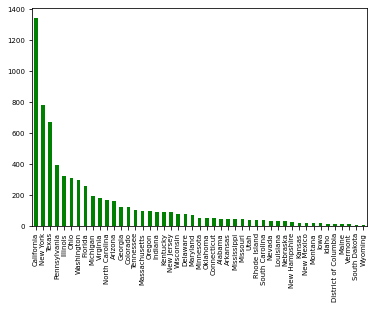

In [ ]:
df['departure state'].value_counts().plot(kind = 'bar',color = 'g',fontsize = 7)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


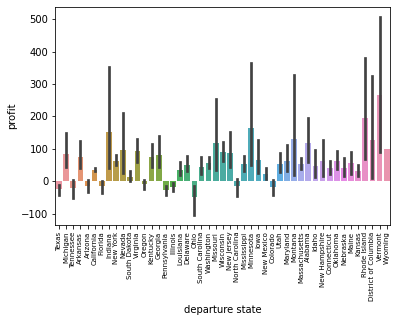

In [ ]:
ax = sns.barplot(df['departure state'],df['profit'])
ax.set_xticklabels(labels = df['departure state'].unique(),rotation = 90,fontsize = 7)
plt.show()

In [ ]:
cat_var = df.dtypes[df.dtypes == 'object'].index
num_var = df.dtypes[df.dtypes != 'object'].index

In [ ]:
cat_var

Index(['departure city', 'location', 'class', 'segment', 'sub-class',
       'delivery type', 'delivery date', 'departure state'],
      dtype='object')

In [ ]:
num_var

Index(['id', 'discount', 'price', 'no of items', 'RID', 'profit',
       'address code', 'month', 'quarter'],
      dtype='object')

In [ ]:
df.drop(['id'],axis = 1,inplace = True)

In [ ]:
len(df['address code'].unique())

562

In [ ]:
df.columns

Index(['departure city', 'discount', 'price', 'no of items', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'RID', 'profit',
       'delivery date', 'address code', 'departure state', 'month', 'quarter'],
      dtype='object')



1.   Departure city -> Categorical -> Requires special encoding (Binary for strters)
2.   Discount -> Numerical -> No missing values -> no special attention required.   
3.   price -> numerical var -> no reuirements (skewed)
4.   no. of items -> cat numeric -> no treatment required
5.   location -> categorical. will require one hot encoding or dummy variables encoding
6.   class -> categorical. one hot encoding or dummy
7.   segment -> categorical. one hot encoding or dummy
8.   sub-class -> categorical. one hot encoding or dummy*
9.   delivery type -> categorical. one hot encoding or dummy
10.  RID -> ID type of variable. unique value for every example. Not significant(my opinion)
11.  profit -> Target variable or dependent variable
12.  delivery date -> drop 
13.  address code -> categorical with high cardinality. Use of hash encoding or Traget encoding depending on results.
14.  departure state -> categorical feature with moderate cardinality. (Discuss)
15.  placement date ->  drop
Consult with team -> negative target variable values (a major concern or not)
# **Final**
dropping dates, RID.
departure -> Binary encoding
address code -> Hash encoding
departure state -> Binary encoding
https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [ ]:
df = df.drop([ 'RID', 'delivery date'], axis = 1)
df_test = df_test.drop(['RID', 'delivery date'], axis = 1)

# **Encoding_departure city**

In [ ]:
import category_encoders as ce

In [ ]:
final_df = pd.concat([df, df_test], axis = 0)

In [ ]:
final_df['profit']

0        5.5512
1       13.3650
2        4.8609
3       12.7368
4       15.9792
         ...   
3289        NaN
3290        NaN
3291        NaN
3292        NaN
3293        NaN
Name: profit, Length: 9994, dtype: float64

In [ ]:
final_df = final_df.reset_index()

In [ ]:
depc_data = pd.DataFrame({'departure city': final_df['departure city'].unique()})
encoder_dep= ce.HashingEncoder(cols=['departure city'],return_df=True)
depc_data

,departure city
0,Houston
1,Westland
2,Smyrna
3,Jonesboro
4,Scottsdale
...,...
526,Port Orange
527,Danbury
528,Abilene
529,Palatine


In [ ]:
depc_data_encoded=encoder_dep.fit_transform(depc_data) 
df_depc = pd.concat([depc_data, depc_data_encoded], axis = 1)
df_depc

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,departure city,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Houston,0,0,0,1,0,0,0,0
1,Westland,0,0,0,0,0,0,0,1
2,Smyrna,0,0,0,1,0,0,0,0
3,Jonesboro,0,0,1,0,0,0,0,0
4,Scottsdale,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
526,Port Orange,0,0,0,1,0,0,0,0
527,Danbury,0,1,0,0,0,0,0,0
528,Abilene,0,0,0,0,1,0,0,0
529,Palatine,0,0,1,0,0,0,0,0


In [ ]:
df_depc.rename(columns={'col_0': 'dc_col_0', 'col_1': 'dc_col_1', 'col_2': 'dc_col_2',
                       'col_3': 'dc_col_3','col_4': 'dc_col_4','col_5': 'dc_col_5',
                       'col_6': 'dc_col_6','col_7': 'dc_col_7','col_8': 'dc_col_8',}, inplace=True)

In [ ]:
final_df_depc = final_df['departure city']
final_df_depc = pd.merge(final_df_depc, df_depc, how='left', on='departure city', left_on=None, right_on=None, left_index=False, right_index=False, sort=None)
final_df_depc

,departure city,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7
0,Houston,0,0,0,1,0,0,0,0
1,Westland,0,0,0,0,0,0,0,1
2,Westland,0,0,0,0,0,0,0,1
3,Westland,0,0,0,0,0,0,0,1
4,Westland,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
9989,New York City,1,0,0,0,0,0,0,0
9990,New York City,1,0,0,0,0,0,0,0
9991,New York City,1,0,0,0,0,0,0,0
9992,San Francisco,0,0,0,0,0,1,0,0


In [ ]:
df_departurecity_train = final_df_depc.iloc[:6700,:]
df_departurecity_test = final_df_depc.iloc[6700:,:]

In [ ]:
df = pd.concat([df, df_departurecity_train], axis = 1)
df = df.drop(['departure city', 'departure city'], axis = 1)
df

,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,address code,departure state,month,quarter,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,5.5512,77095,Texas,1,1,0,0,0,1,0,0,0,0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,13.3650,48185,Michigan,1,1,0,0,0,0,0,0,0,1
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,4.8609,48185,Michigan,1,1,0,0,0,0,0,0,0,1
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,12.7368,48185,Michigan,1,1,0,0,0,0,0,0,0,1
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,15.9792,48185,Michigan,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,152.0232,5408,Vermont,1,1,0,0,1,0,0,0,0,0
6696,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,89.9548,95123,California,1,1,0,0,0,0,1,0,0,0
6697,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,0.9588,5408,Vermont,1,1,0,0,1,0,0,0,0,0
6698,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,2.3094,10024,New York,1,1,1,0,0,0,0,0,0,0


In [ ]:
df.columns 

Index(['discount', 'price', 'no of items', 'location', 'class', 'segment',
       'sub-class', 'delivery type', 'profit', 'address code',
       'departure state', 'month', 'quarter', 'dc_col_0', 'dc_col_1',
       'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6', 'dc_col_7'],
      dtype='object')

# Encoding_departure_state

In [ ]:
deps_data = pd.DataFrame({'departure state': final_df['departure state'].unique()})
encoder_dep= ce.HashingEncoder(cols=['departure state'],return_df=True)
deps_data

,departure state
0,Texas
1,Michigan
2,Tennessee
3,Arkansas
4,Arizona
5,California
6,Florida
7,Indiana
8,New York
9,Nevada


In [ ]:
deps_data_encoded=encoder_dep.fit_transform(deps_data) 
df_deps = pd.concat([deps_data, deps_data_encoded], axis = 1)
df_deps

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,departure state,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Texas,0,0,1,0,0,0,0,0
1,Michigan,1,0,0,0,0,0,0,0
2,Tennessee,0,0,0,0,0,0,0,1
3,Arkansas,0,0,1,0,0,0,0,0
4,Arizona,1,0,0,0,0,0,0,0
5,California,0,0,0,0,1,0,0,0
6,Florida,1,0,0,0,0,0,0,0
7,Indiana,0,1,0,0,0,0,0,0
8,New York,0,0,0,1,0,0,0,0
9,Nevada,0,0,0,1,0,0,0,0


In [ ]:
final_df_deps = final_df['departure state']
final_df_deps = pd.merge(final_df_deps, df_deps, how='left', on='departure state', left_on=None, right_on=None, left_index=False, right_index=False, sort=None)
final_df_deps

,departure state,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Texas,0,0,1,0,0,0,0,0
1,Michigan,1,0,0,0,0,0,0,0
2,Michigan,1,0,0,0,0,0,0,0
3,Michigan,1,0,0,0,0,0,0,0
4,Michigan,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9989,New York,0,0,0,1,0,0,0,0
9990,New York,0,0,0,1,0,0,0,0
9991,New York,0,0,0,1,0,0,0,0
9992,California,0,0,0,0,1,0,0,0


In [ ]:
df_departurestate_train = final_df_deps.iloc[:6700,:]
df_departurestate_test = final_df_deps.iloc[6700:,:]

In [ ]:
df = pd.concat([df, df_departurestate_train], axis = 1)
df = df.drop(['departure state', 'departure state'], axis = 1)
df

,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,address code,month,quarter,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,5.5512,77095,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,13.3650,48185,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,4.8609,48185,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,12.7368,48185,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,15.9792,48185,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,152.0232,5408,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6696,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,89.9548,95123,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6697,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,0.9588,5408,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6698,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,2.3094,10024,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'location', 'class', 'segment',
       'sub-class', 'delivery type', 'profit', 'address code', 'month',
       'quarter', 'dc_col_0', 'dc_col_1', 'dc_col_2', 'dc_col_3', 'dc_col_4',
       'dc_col_5', 'dc_col_6', 'dc_col_7', 'col_0', 'col_1', 'col_2', 'col_3',
       'col_4', 'col_5', 'col_6', 'col_7'],
      dtype='object')

# Encoding_address_code

In [ ]:
address_data = pd.DataFrame({'address code': final_df['address code'].unique()})
encoder_dep= ce.HashingEncoder(cols=['address code'],return_df=True)
address_data

,address code
0,77095
1,48185
2,37167
3,72401
4,85254
...,...
626,98208
627,6810
628,79605
629,60067


In [ ]:
address_data_encoded=encoder_dep.fit_transform(address_data) 
df_address = pd.concat([address_data, address_data_encoded], axis = 1)
df_address

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,address code,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,77095,0,0,0,0,1,0,0,0
1,48185,0,0,0,0,0,1,0,0
2,37167,0,0,0,0,1,0,0,0
3,72401,0,0,0,1,0,0,0,0
4,85254,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
626,98208,0,1,0,0,0,0,0,0
627,6810,0,1,0,0,0,0,0,0
628,79605,0,0,0,0,0,0,1,0
629,60067,0,0,0,0,0,0,1,0


In [ ]:
final_df_address = final_df['address code']
final_df_address = pd.merge(final_df_address, df_address, how='left', on='address code', left_on=None, right_on=None, left_index=False, right_index=False, sort=None)
final_df_address

,address code,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,77095,0,0,0,0,1,0,0,0
1,48185,0,0,0,0,0,1,0,0
2,48185,0,0,0,0,0,1,0,0
3,48185,0,0,0,0,0,1,0,0
4,48185,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
9989,10035,1,0,0,0,0,0,0,0
9990,10035,1,0,0,0,0,0,0,0
9991,10035,1,0,0,0,0,0,0,0
9992,94110,0,0,0,0,1,0,0,0


In [ ]:
final_df_address.rename(columns={'col_0': 'add_col_0', 'col_1': 'add_col_1', 'col_2': 'add_col_2',
                       'col_3': 'add_col_3','col_4': 'add_col_4','col_5': 'add_col_5',
                       'col_6': 'add_col_6','col_7': 'add_col_7','col_8': 'add_col_8',}, inplace=True)

In [ ]:
df_address_train = final_df_address.iloc[:6700,:]
df_address_test = final_df_address.iloc[6700:,:]

In [ ]:
df = pd.concat([df, df_address_train], axis = 1)
df = df.drop(['address code', 'address code'], axis = 1)
df

,discount,price,no of items,location,class,segment,sub-class,delivery type,profit,month,quarter,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,add_col_0,add_col_1,add_col_2,add_col_3,add_col_4,add_col_5,add_col_6,add_col_7
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,5.5512,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,13.3650,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,4.8609,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,12.7368,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,15.9792,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,152.0232,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6696,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,89.9548,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6697,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,0.9588,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6698,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,2.3094,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'location', 'class', 'segment',
       'sub-class', 'delivery type', 'profit', 'month', 'quarter', 'dc_col_0',
       'dc_col_1', 'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6',
       'dc_col_7', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3',
       'add_col_4', 'add_col_5', 'add_col_6', 'add_col_7'],
      dtype='object')

# **One Hot encoding**   

In [ ]:
y = pd.get_dummies(df.location, prefix='Location')

In [ ]:
y.shape

(6700, 4)

In [ ]:
df = pd.concat([df, y], axis = 1)

In [ ]:
se = pd.get_dummies(df.segment, prefix='Segment')
print(se.head(20))

    Segment_Consumer  Segment_Corporate  Segment_Home Office
0                  1                  0                    0
1                  1                  0                    0
2                  1                  0                    0
3                  1                  0                    0
4                  1                  0                    0
5                  1                  0                    0
6                  1                  0                    0
7                  1                  0                    0
8                  0                  1                    0
9                  1                  0                    0
10                 1                  0                    0
11                 1                  0                    0
12                 1                  0                    0
13                 1                  0                    0
14                 1                  0                    0
15                 1    

In [ ]:
df = pd.concat([df, se], axis = 1)
df = df.drop(['segment'], axis = 1)

In [ ]:

df.columns

Index(['discount', 'price', 'no of items', 'location', 'class', 'sub-class',
       'delivery type', 'profit', 'month', 'quarter', 'dc_col_0', 'dc_col_1',
       'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6', 'dc_col_7',
       'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3', 'add_col_4',
       'add_col_5', 'add_col_6', 'add_col_7', 'Location_Central',
       'Location_East', 'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office'],
      dtype='object')

In [ ]:
df.rename(columns={'class': 'class1'}, inplace=True) #Ye kyo kara hai ek baar explain kariyega.
#class uska attribute hai shayad, to dummy lete time error de rha tha, name change krne pe error dena band kr diya 

In [ ]:
cl = pd.get_dummies(df.class1, prefix='Class')
print(cl.head(20))

    Class_fynota  Class_kariox  Class_qexty
0              0             1            0
1              0             1            0
2              0             0            1
3              0             1            0
4              0             1            0
5              0             1            0
6              0             1            0
7              0             0            1
8              0             1            0
9              0             1            0
10             0             0            1
11             0             1            0
12             0             1            0
13             0             0            1
14             0             1            0
15             1             0            0
16             0             0            1
17             0             1            0
18             0             1            0
19             0             0            1


In [ ]:
df = pd.concat([df, cl], axis = 1)
df = df.drop(['location', 'class1'], axis = 1) #dummy le rahe hai to drop kare extra column.

In [ ]:
df = df.drop(['Location_Central', 'Segment_Corporate', 'Class_qexty'], axis = 1)

In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'sub-class', 'delivery type',
       'profit', 'month', 'quarter', 'dc_col_0', 'dc_col_1', 'dc_col_2',
       'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6', 'dc_col_7', 'col_0',
       'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3', 'add_col_4',
       'add_col_5', 'add_col_6', 'add_col_7', 'Location_East',
       'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Home Office', 'Class_fynota', 'Class_kariox'],
      dtype='object')

In [ ]:
len(df['sub-class'].unique())

17

In [ ]:
df_subclass = pd.get_dummies(df['sub-class'],prefix = 'sub-class')

In [ ]:
df_subclass.drop(['sub-class_sweets'],axis = 1,inplace = True)

In [ ]:
df = pd.concat([df,df_subclass],axis = 1)

In [ ]:
df = df.drop(['sub-class'], axis = 1)

In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'delivery type', 'profit', 'month',
       'quarter', 'dc_col_0', 'dc_col_1', 'dc_col_2', 'dc_col_3', 'dc_col_4',
       'dc_col_5', 'dc_col_6', 'dc_col_7', 'col_0', 'col_1', 'col_2', 'col_3',
       'col_4', 'col_5', 'col_6', 'col_7', 'add_col_0', 'add_col_1',
       'add_col_2', 'add_col_3', 'add_col_4', 'add_col_5', 'add_col_6',
       'add_col_7', 'Location_East', 'Location_South', 'Location_West',
       'Segment_Consumer', 'Segment_Home Office', 'Class_fynota',
       'Class_kariox', 'sub-class_battery', 'sub-class_charger',
       'sub-class_chocolates', 'sub-class_colddrinks', 'sub-class_fastfood',
       'sub-class_headset', 'sub-class_hoodies', 'sub-class_laptop',
       'sub-class_lighting', 'sub-class_pants', 'sub-class_phone',
       'sub-class_shorts', 'sub-class_tablet', 'sub-class_television',
       'sub-class_tshirts', 'sub-class_watch'],
      dtype='object')

In [ ]:
df['delivery type'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [ ]:
df_dtype = pd.get_dummies(df['delivery type'],prefix = 'dtype')

In [ ]:
df_dtype.head()
#df_dtype.size

,dtype_First Class,dtype_Same Day,dtype_Second Class,dtype_Standard Class
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
df_dtype = df_dtype.drop(['dtype_Same Day'],axis = 1)

In [ ]:
df = pd.concat([df, df_dtype], axis = 1)
df = df.drop(['delivery type'], axis = 1)

In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'profit', 'month', 'quarter',
       'dc_col_0', 'dc_col_1', 'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5',
       'dc_col_6', 'dc_col_7', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4',
       'col_5', 'col_6', 'col_7', 'add_col_0', 'add_col_1', 'add_col_2',
       'add_col_3', 'add_col_4', 'add_col_5', 'add_col_6', 'add_col_7',
       'Location_East', 'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Home Office', 'Class_fynota', 'Class_kariox',
       'sub-class_battery', 'sub-class_charger', 'sub-class_chocolates',
       'sub-class_colddrinks', 'sub-class_fastfood', 'sub-class_headset',
       'sub-class_hoodies', 'sub-class_laptop', 'sub-class_lighting',
       'sub-class_pants', 'sub-class_phone', 'sub-class_shorts',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'dtype_First Class', 'dtype_Second Class',
       'dtype_Standard Class'],
      dtype='object')

In [ ]:
df.head()

,discount,price,no of items,profit,month,quarter,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,add_col_0,add_col_1,add_col_2,add_col_3,add_col_4,add_col_5,add_col_6,add_col_7,Location_East,Location_South,Location_West,Segment_Consumer,Segment_Home Office,Class_fynota,Class_kariox,sub-class_battery,sub-class_charger,sub-class_chocolates,sub-class_colddrinks,sub-class_fastfood,sub-class_headset,sub-class_hoodies,sub-class_laptop,sub-class_lighting,sub-class_pants,sub-class_phone,sub-class_shorts,sub-class_tablet,sub-class_television,sub-class_tshirts,sub-class_watch,dtype_First Class,dtype_Second Class,dtype_Standard Class
0,0.2,16.448,2,5.5512,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.0,29.700,5,13.3650,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,14.730,3,4.8609,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.0,43.920,3,12.7368,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.0,66.580,2,15.9792,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [ ]:
df.isnull().sum()

discount                0
price                   0
no of items             0
profit                  0
month                   0
quarter                 0
dc_col_0                0
dc_col_1                0
dc_col_2                0
dc_col_3                0
dc_col_4                0
dc_col_5                0
dc_col_6                0
dc_col_7                0
col_0                   0
col_1                   0
col_2                   0
col_3                   0
col_4                   0
col_5                   0
col_6                   0
col_7                   0
add_col_0               0
add_col_1               0
add_col_2               0
add_col_3               0
add_col_4               0
add_col_5               0
add_col_6               0
add_col_7               0
Location_East           0
Location_South          0
Location_West           0
Segment_Consumer        0
Segment_Home Office     0
Class_fynota            0
Class_kariox            0
sub-class_battery       0
sub-class_ch

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3294 non-null   int64  
 1   departure city   3294 non-null   object 
 2   discount         3294 non-null   float64
 3   price            3294 non-null   float64
 4   no of items      3294 non-null   int64  
 5   location         3294 non-null   object 
 6   class            3294 non-null   object 
 7   segment          3294 non-null   object 
 8   sub-class        3294 non-null   object 
 9   delivery type    3294 non-null   object 
 10  address code     3294 non-null   int64  
 11  departure state  3294 non-null   object 
 12  month            3294 non-null   int64  
 13  quarter          3294 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 360.4+ KB


In [ ]:
df_test.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,address code,departure state,month,quarter
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,94122,California,1,1
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,94122,California,1,1
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,6708,Connecticut,1,1
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,60653,Illinois,1,1
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,98115,Washington,1,1


# **Encoding Test Data**

In [ ]:
df_test = df_test.drop(['id'], axis = 1)

In [ ]:
df_departurecity_test = df_departurecity_test.reset_index()

In [ ]:
df_departurestate_test = df_departurestate_test.reset_index()

In [ ]:
df_address_test = df_address_test.reset_index()

In [ ]:
df_test = pd.concat([df_test, df_departurecity_test], axis = 1)
df_test = df_test.drop(['departure city', 'departure city'], axis = 1)
df_test

,discount,price,no of items,location,class,segment,sub-class,delivery type,address code,departure state,month,quarter,index,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7
0,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,94122,California,1,1,6700,0,0,0,0,0,1,0,0
1,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,94122,California,1,1,6701,0,0,0,0,0,1,0,0
2,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,6708,Connecticut,1,1,6702,0,0,1,0,0,0,0,0
3,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,60653,Illinois,1,1,6703,0,0,1,0,0,0,0,0
4,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,98115,Washington,1,1,6704,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,10035,New York,12,4,9989,1,0,0,0,0,0,0,0
3290,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,10035,New York,12,4,9990,1,0,0,0,0,0,0,0
3291,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,10035,New York,12,4,9991,1,0,0,0,0,0,0,0
3292,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,94110,California,12,4,9992,0,0,0,0,0,1,0,0


In [ ]:
df_test = pd.concat([df_test, df_departurestate_test], axis = 1)
df_test = df_test.drop(['departure state', 'departure state'], axis = 1)
df_test

,discount,price,no of items,location,class,segment,sub-class,delivery type,address code,month,quarter,index,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7,index,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,94122,1,1,6700,0,0,0,0,0,1,0,0,6700,0,0,0,0,1,0,0,0
1,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,94122,1,1,6701,0,0,0,0,0,1,0,0,6701,0,0,0,0,1,0,0,0
2,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,6708,1,1,6702,0,0,1,0,0,0,0,0,6702,0,0,0,1,0,0,0,0
3,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,60653,1,1,6703,0,0,1,0,0,0,0,0,6703,0,0,0,0,0,0,0,1
4,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,98115,1,1,6704,0,0,0,0,0,0,0,1,6704,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,10035,12,4,9989,1,0,0,0,0,0,0,0,9989,0,0,0,1,0,0,0,0
3290,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,10035,12,4,9990,1,0,0,0,0,0,0,0,9990,0,0,0,1,0,0,0,0
3291,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,10035,12,4,9991,1,0,0,0,0,0,0,0,9991,0,0,0,1,0,0,0,0
3292,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,94110,12,4,9992,0,0,0,0,0,1,0,0,9992,0,0,0,0,1,0,0,0


In [ ]:
df_test = pd.concat([df_test, df_address_test], axis = 1)
df_test = df_test.drop(['address code', 'address code'], axis = 1)
df_test

,discount,price,no of items,location,class,segment,sub-class,delivery type,month,quarter,index,dc_col_0,dc_col_1,dc_col_2,dc_col_3,dc_col_4,dc_col_5,dc_col_6,dc_col_7,index,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,index,add_col_0,add_col_1,add_col_2,add_col_3,add_col_4,add_col_5,add_col_6,add_col_7
0,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,1,1,6700,0,0,0,0,0,1,0,0,6700,0,0,0,0,1,0,0,0,6700,0,0,0,0,1,0,0,0
1,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,1,1,6701,0,0,0,0,0,1,0,0,6701,0,0,0,0,1,0,0,0,6701,0,0,0,0,1,0,0,0
2,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,1,1,6702,0,0,1,0,0,0,0,0,6702,0,0,0,1,0,0,0,0,6702,0,0,0,0,0,0,0,1
3,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,1,1,6703,0,0,1,0,0,0,0,0,6703,0,0,0,0,0,0,0,1,6703,0,0,0,0,0,0,1,0
4,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,1,1,6704,0,0,0,0,0,0,0,1,6704,0,0,1,0,0,0,0,0,6704,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,12,4,9989,1,0,0,0,0,0,0,0,9989,0,0,0,1,0,0,0,0,9989,1,0,0,0,0,0,0,0
3290,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,12,4,9990,1,0,0,0,0,0,0,0,9990,0,0,0,1,0,0,0,0,9990,1,0,0,0,0,0,0,0
3291,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,12,4,9991,1,0,0,0,0,0,0,0,9991,0,0,0,1,0,0,0,0,9991,1,0,0,0,0,0,0,0
3292,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,12,4,9992,0,0,0,0,0,1,0,0,9992,0,0,0,0,1,0,0,0,9992,0,0,0,0,1,0,0,0


In [ ]:
df_test.columns

Index(['discount', 'price', 'no of items', 'location', 'class', 'segment',
       'sub-class', 'delivery type', 'month', 'quarter', 'index', 'dc_col_0',
       'dc_col_1', 'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6',
       'dc_col_7', 'index', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4',
       'col_5', 'col_6', 'col_7', 'index', 'add_col_0', 'add_col_1',
       'add_col_2', 'add_col_3', 'add_col_4', 'add_col_5', 'add_col_6',
       'add_col_7'],
      dtype='object')

In [ ]:
y_test = pd.get_dummies(df_test.location, prefix='Location')

In [ ]:
y_test.shape

(3294, 4)

In [ ]:
df_test = pd.concat([df_test, y_test], axis = 1)

In [ ]:
se_test = pd.get_dummies(df_test.segment, prefix='Segment')
print(se_test.head(20))

    Segment_Consumer  Segment_Corporate  Segment_Home Office
0                  1                  0                    0
1                  1                  0                    0
2                  1                  0                    0
3                  1                  0                    0
4                  0                  0                    1
5                  0                  0                    1
6                  0                  0                    1
7                  0                  0                    1
8                  0                  0                    1
9                  0                  0                    1
10                 0                  0                    1
11                 0                  0                    1
12                 0                  0                    1
13                 0                  1                    0
14                 1                  0                    0
15                 0    

In [ ]:
df_test = pd.concat([df_test, se_test], axis = 1)
df_test = df_test.drop(['segment'], axis = 1)

In [ ]:
df_test.rename(columns={'class': 'class1'}, inplace=True)

In [ ]:
cl_test = pd.get_dummies(df_test.class1, prefix='Class')
print(cl_test.head(20))

    Class_fynota  Class_kariox  Class_qexty
0              0             1            0
1              1             0            0
2              0             1            0
3              0             1            0
4              0             1            0
5              1             0            0
6              0             1            0
7              0             0            1
8              0             1            0
9              0             1            0
10             0             1            0
11             0             1            0
12             0             1            0
13             1             0            0
14             0             1            0
15             0             1            0
16             0             1            0
17             1             0            0
18             0             1            0
19             0             1            0


In [ ]:
df_test = pd.concat([df_test, cl_test], axis = 1)
df_test = df_test.drop(['location', 'class1'], axis = 1)

In [ ]:
df_test = df_test.drop(['Location_Central', 'Segment_Corporate', 'Class_qexty'], axis = 1)

In [ ]:
df_test_subclass = pd.get_dummies(df_test['sub-class'],prefix = 'sub-class')

In [ ]:
df_test_subclass.drop(['sub-class_sweets'],axis = 1,inplace = True)

In [ ]:
df_test = pd.concat([df_test,df_test_subclass],axis = 1)

In [ ]:
df_test = df_test.drop(['sub-class'], axis = 1)

In [ ]:
df_test_dtype = pd.get_dummies(df_test['delivery type'],prefix = 'dtype')

In [ ]:
df_test_dtype = df_test_dtype.drop(['dtype_Same Day'],axis = 1)

In [ ]:
df_test = pd.concat([df_test, df_test_dtype], axis = 1)
df_test = df_test.drop(['delivery type'], axis = 1)

In [ ]:
df_test = df_test.drop(['index', 'index', 'index'], axis = 1)

In [ ]:
df_test.columns

Index(['discount', 'price', 'no of items', 'month', 'quarter', 'dc_col_0',
       'dc_col_1', 'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6',
       'dc_col_7', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3',
       'add_col_4', 'add_col_5', 'add_col_6', 'add_col_7', 'Location_East',
       'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Home Office', 'Class_fynota', 'Class_kariox',
       'sub-class_battery', 'sub-class_charger', 'sub-class_chocolates',
       'sub-class_colddrinks', 'sub-class_fastfood', 'sub-class_headset',
       'sub-class_hoodies', 'sub-class_laptop', 'sub-class_lighting',
       'sub-class_pants', 'sub-class_phone', 'sub-class_shorts',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'dtype_First Class', 'dtype_Second Class',
       'dtype_Standard Class'],
      dtype='object')

In [ ]:
df_test_copy['price']

0        24.200
1       359.976
2         3.520
3        11.520
4       242.940
         ...   
3289     31.920
3290     19.440
3291    272.940
3292    113.568
3293      3.024
Name: price, Length: 3294, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


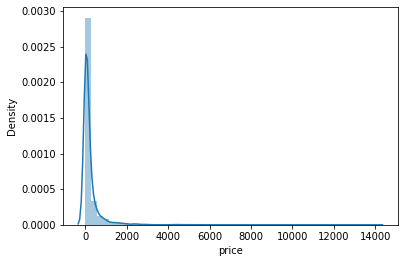

In [ ]:
sns.distplot(df_test_copy['price'])
plt.show()

In [ ]:
df['quarter'].unique()

array([1, 2, 3, 4])

# Month_Quarter

In [ ]:
m = pd.get_dummies(df.month, prefix='Month')
m_t = pd.get_dummies(df_test.month, prefix='Month')

df = pd.concat([df, m], axis = 1)
df_test = pd.concat([df_test, m_t], axis = 1)

#q = pd.get_dummies(df.quarter, prefix='Quarter')
#q_t = pd.get_dummies(df_test.quarter, prefix='Quarter')

#df = pd.concat([df, q], axis = 1)
df = df.drop(['quarter','month'],axis = 1)
#df_test = pd.concat([df_test, q_t], axis = 1)
df_test = df_test.drop(['quarter','month'],axis = 1)

df=df.drop(['Month_1'],axis=1)
df_test=df_test.drop(['Month_1'],axis=1)

In [ ]:
len(df_test.columns)

64

In [ ]:
len(df.columns)

65

In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'profit', 'dc_col_0', 'dc_col_1',
       'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6', 'dc_col_7',
       'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3', 'add_col_4',
       'add_col_5', 'add_col_6', 'add_col_7', 'Location_East',
       'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Home Office', 'Class_fynota', 'Class_kariox',
       'sub-class_battery', 'sub-class_charger', 'sub-class_chocolates',
       'sub-class_colddrinks', 'sub-class_fastfood', 'sub-class_headset',
       'sub-class_hoodies', 'sub-class_laptop', 'sub-class_lighting',
       'sub-class_pants', 'sub-class_phone', 'sub-class_shorts',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'dtype_First Class', 'dtype_Second Class',
       'dtype_Standard Class', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       '

In [ ]:
df_test.columns

Index(['discount', 'price', 'no of items', 'dc_col_0', 'dc_col_1', 'dc_col_2',
       'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6', 'dc_col_7', 'col_0',
       'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3', 'add_col_4',
       'add_col_5', 'add_col_6', 'add_col_7', 'Location_East',
       'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Home Office', 'Class_fynota', 'Class_kariox',
       'sub-class_battery', 'sub-class_charger', 'sub-class_chocolates',
       'sub-class_colddrinks', 'sub-class_fastfood', 'sub-class_headset',
       'sub-class_hoodies', 'sub-class_laptop', 'sub-class_lighting',
       'sub-class_pants', 'sub-class_phone', 'sub-class_shorts',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'dtype_First Class', 'dtype_Second Class',
       'dtype_Standard Class', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 

# **Model Preparation**

In [ ]:
y_train = df['profit']

In [ ]:
x_train = df.drop(['profit'], axis = 1)

In [ ]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train, y_train)

[12:54:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

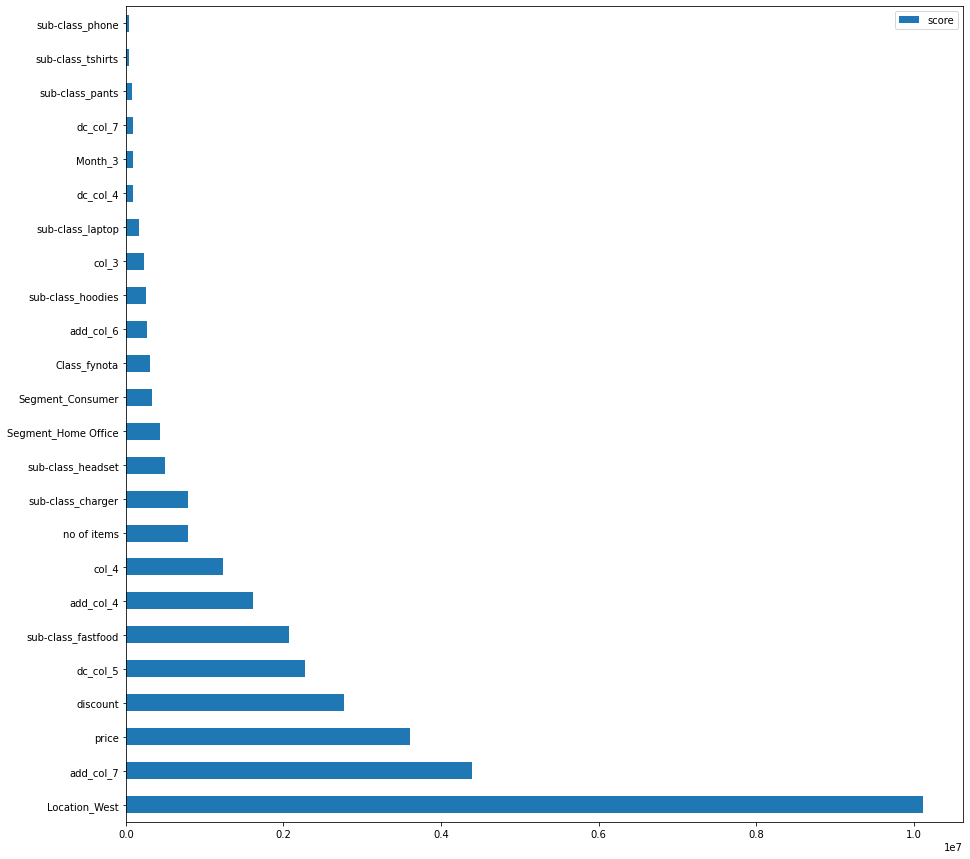

In [ ]:
# sorted_idx = classifier.feature_importances_.argsort()
# plt.barh(df.feature_names[sorted_idx], classifier.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost Feature Importance")

feature_important = classifier.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',fontsize = 10,figsize = (15,15))

In [ ]:
# import pickle
# filename = 'finalized_model.pkl'
# pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
y_pred = classifier.predict(df_test)

In [ ]:
y_pred

array([10.765624, 25.550545, 10.765624, ..., 46.45173 , 15.834402,
       10.793734], dtype=float32)

In [ ]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('https://raw.githubusercontent.com/imswatantra/KDAG/main/sampleSolution.csv')
datasets = pd.concat([sub_df['id'], pred], axis = 1)
datasets.columns = ['id', 'profit']
datasets.to_csv('sample_submission.csv', index = False)

In [ ]:
sub = pd.DataFrame({'id':df_test_copy.id,'profit':y_pred})

In [ ]:
sub.to_csv('last.csv',index = False)

In [ ]:
datasets

,id,profit
0,6701,10.765624
1,6702,25.550545
2,6703,10.765624
3,6704,9.212823
4,6705,32.758938
...,...,...
3289,9990,-1.514708
3290,9991,10.566256
3291,9992,46.451729
3292,9993,15.834402


In [ ]:
df.columns

Index(['discount', 'price', 'no of items', 'profit', 'dc_col_0', 'dc_col_1',
       'dc_col_2', 'dc_col_3', 'dc_col_4', 'dc_col_5', 'dc_col_6', 'dc_col_7',
       'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'add_col_0', 'add_col_1', 'add_col_2', 'add_col_3', 'add_col_4',
       'add_col_5', 'add_col_6', 'add_col_7', 'Location_East',
       'Location_South', 'Location_West', 'Segment_Consumer',
       'Segment_Home Office', 'Class_fynota', 'Class_kariox',
       'sub-class_battery', 'sub-class_charger', 'sub-class_chocolates',
       'sub-class_colddrinks', 'sub-class_fastfood', 'sub-class_headset',
       'sub-class_hoodies', 'sub-class_laptop', 'sub-class_lighting',
       'sub-class_pants', 'sub-class_phone', 'sub-class_shorts',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'dtype_First Class', 'dtype_Second Class',
       'dtype_Standard Class', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       '